# K-means clustering

## import library

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [39]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

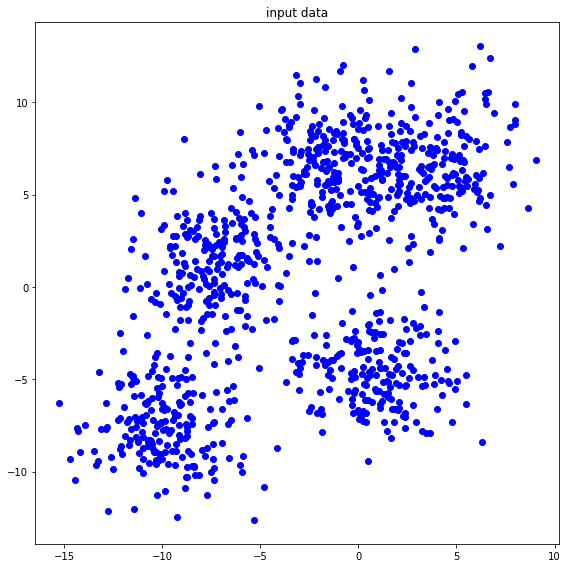

In [40]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [41]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    distance = np.sum((feature - center)**2, axis=1)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

# compute_distance(np.array([[1,1],[2,2],[3,3]]), np.array([1,1]))

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [42]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    points = []
    for i in range(feature.shape[0]):
        if label_feature[i] == label: points.append(feature[i])
    if points == []: return None
    points = np.array(points)
    centroid = (np.sum(points, axis=0))/feature.shape[0]
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

# compute_centroid(feature, np.ones(feature.shape[0]), 1)

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [43]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = np.zeros(distance.shape[0])
    for i in range(len(label_feature)):
        label_feature[i] = np.where(distance[i] == distance[i].min())[0][0]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return np.int32(label_feature)

# compute_label(np.array([[1,2,3,4], [4,3,2,1], [3,5,1,7], [7,1,9,3,], [2,2,1,3]]))

## compute loss

In [44]:
def compute_loss(feature, label_feature, centroid):
    points = [[] for _ in range(len(centroid))]
    
    for i in range(len(feature)):
        label = label_feature[i]
        points[label].append(feature[i])

    total = 0
    for i in range(len(points)):
        if points[i] == []: continue
        t = np.array(points[i])
        total += np.sum(compute_distance(t, centroid[i]))

    return total/len(feature)

# test_feature = np.array([[1,1],[2,2],[3,3],[4,4]])
# test_label = np.array([0,0,0,1])
# test_centroid = np.array([[1,1],[2,2]])
# compute_loss(test_feature, test_label, test_centroid)

## the number of clusters $K = 2$

In [45]:
number_cluster          = 2
number_iteration        = 10     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [46]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    # 1. compute centroid
    for j in range(number_cluster):
        cent = compute_centroid(feature, label_feature_02, j)
        if cent is not None:
            centroid_iteration_02[i][j][0] = cent[0]
            centroid_iteration_02[i][j][1] = cent[1]
        else:
            centroid_iteration_02[i][j][0] = centroid_iteration_02[i-1][j][0]
            centroid_iteration_02[i][j][1] = centroid_iteration_02[i-1][j][0]

    # 2. compute loss
    loss_iteration_02[i] = compute_loss(feature, label_feature_02, centroid_iteration_02[i])

    # 3. compute distance
    distance = []
    for j in range(number_cluster):
        cent = centroid_iteration_02[i][j]
        distance.append(compute_distance(feature, cent))
    distance = np.vstack(distance).T

    # 4. compute label(re-label)
    label_feature_02 = compute_label(distance)
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [47]:
number_cluster          = 4
number_iteration        = 10     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [48]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    # 1. compute centroid
    for j in range(number_cluster):
        cent = compute_centroid(feature, label_feature_04, j)
        if cent is not None:
            centroid_iteration_04[i][j][0] = cent[0]
            centroid_iteration_04[i][j][1] = cent[1]
        else:
            centroid_iteration_04[i][j][0] = centroid_iteration_04[i-1][j][0]
            centroid_iteration_04[i][j][1] = centroid_iteration_04[i-1][j][0]

    # 2. compute loss
    loss_iteration_04[i] = compute_loss(feature, label_feature_04, centroid_iteration_04[i])

    # 3. compute distance
    distance = []
    for j in range(number_cluster):
        cent = centroid_iteration_04[i][j]
        distance.append(compute_distance(feature, cent))
    distance = np.vstack(distance).T

    # 4. compute label(re-label)
    label_feature_04 = compute_label(distance)
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [49]:
number_cluster          = 8
number_iteration        = 10     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [50]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    # 1. compute centroid
    for j in range(number_cluster):
        cent = compute_centroid(feature, label_feature_08, j)
        if cent is not None:
            centroid_iteration_08[i][j][0] = cent[0]
            centroid_iteration_08[i][j][1] = cent[1]
        else:
            centroid_iteration_08[i][j][0] = centroid_iteration_08[i-1][j][0]
            centroid_iteration_08[i][j][1] = centroid_iteration_08[i-1][j][0]

    # 2. compute loss
    loss_iteration_08[i] = compute_loss(feature, label_feature_08, centroid_iteration_08[i])

    # 3. compute distance
    distance = []
    for j in range(number_cluster):
        cent = centroid_iteration_08[i][j]
        distance.append(compute_distance(feature, cent))
    distance = np.vstack(distance).T

    # 4. compute label(re-label)
    label_feature_08 = compute_label(distance)
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [51]:
number_cluster          = 16
number_iteration        = 10     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [52]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    # 1. compute centroid
    for j in range(number_cluster):
        cent = compute_centroid(feature, label_feature_16, j)
        if cent is not None:
            centroid_iteration_16[i][j][0] = cent[0]
            centroid_iteration_16[i][j][1] = cent[1]
        else:
            centroid_iteration_16[i][j][0] = centroid_iteration_16[i-1][j][0]
            centroid_iteration_16[i][j][1] = centroid_iteration_16[i-1][j][0]

    # 2. compute loss
    loss_iteration_16[i] = compute_loss(feature, label_feature_16, centroid_iteration_16[i])

    # 3. compute distance
    distance = []
    for j in range(number_cluster):
        cent = centroid_iteration_16[i][j]
        distance.append(compute_distance(feature, cent))
    distance = np.vstack(distance).T

    # 4. compute label(re-label)
    label_feature_16 = compute_label(distance)
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [53]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [54]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [55]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [56]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [57]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [58]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [59]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [60]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

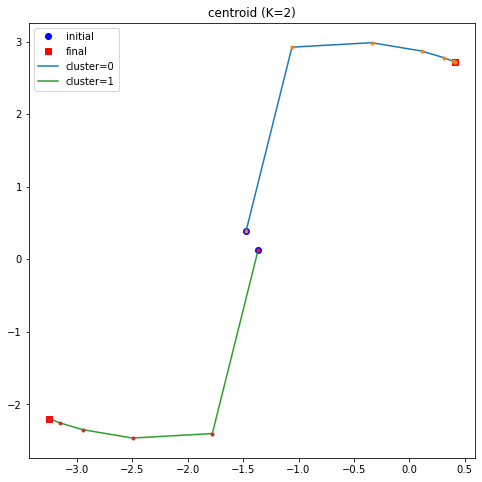

In [111]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #plt.scatter(x,y,color='black')
    initial02 = centroid_iteration_02[0]
    final02 = centroid_iteration_02[-1]

    plt.plot(initial02[:,0], initial02[:,1], 'o', color='blue', label='initial')
    plt.plot(final02[:,0], final02[:,1], 's', color='red', label='final')

    label_process = [centroid_iteration_02[:,i,:] for i in range(2)] 
    for i in range(2):
        name = 'cluster=' + str(i)
        plt.plot(label_process[i][:,0], label_process[i][:,1], '-', label=name)
        plt.plot(label_process[i][:,0], label_process[i][:,1], '.')
    
    plt.legend()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

function_result_09()

In [62]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [63]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [64]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [65]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [66]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [67]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [68]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 41.8475673746
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 40.0392678136
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) = 40.0392265272
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) = 40.0392465430
**************************************************
## [RESULT 05]
**************************************************


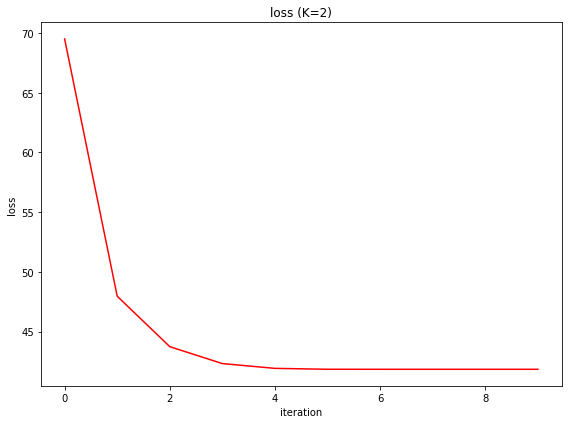

**************************************************
## [RESULT 06]
**************************************************


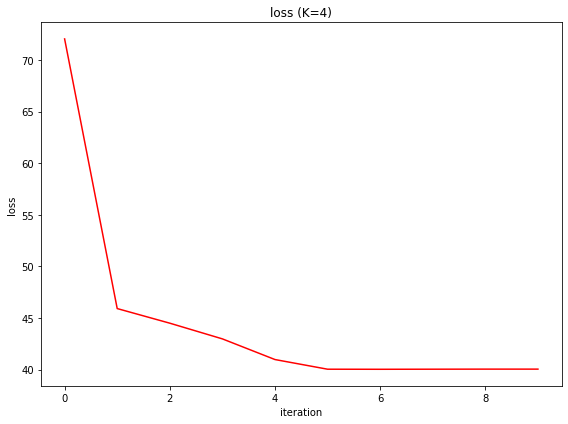

**************************************************
## [RESULT 07]
**************************************************


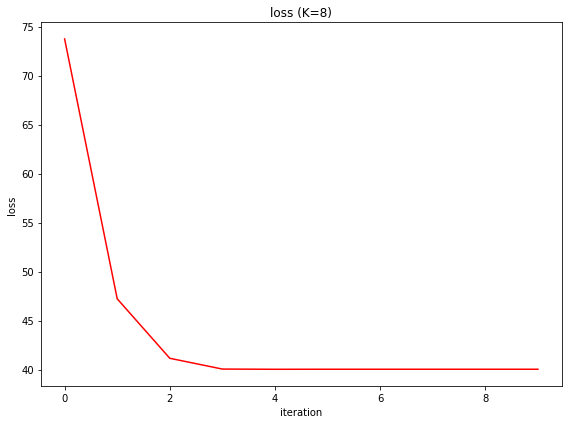

**************************************************
## [RESULT 08]
**************************************************


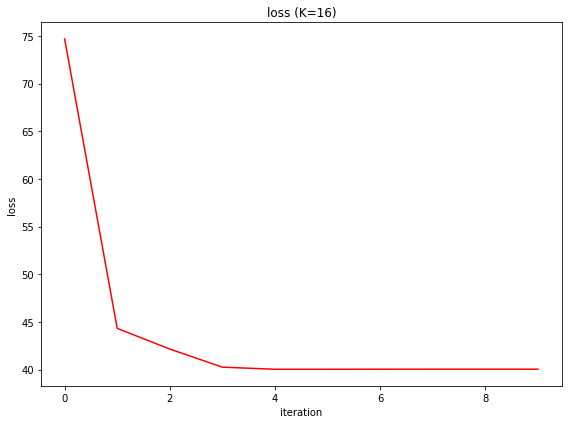

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


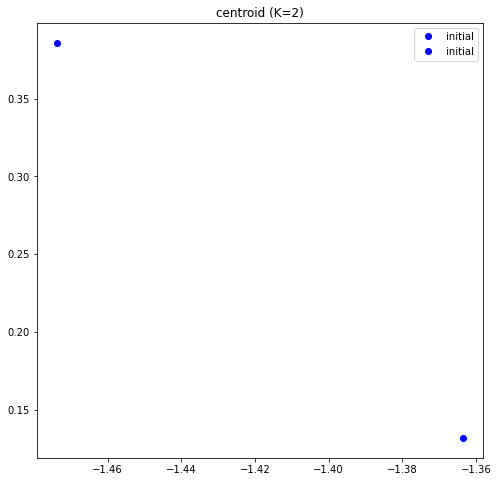

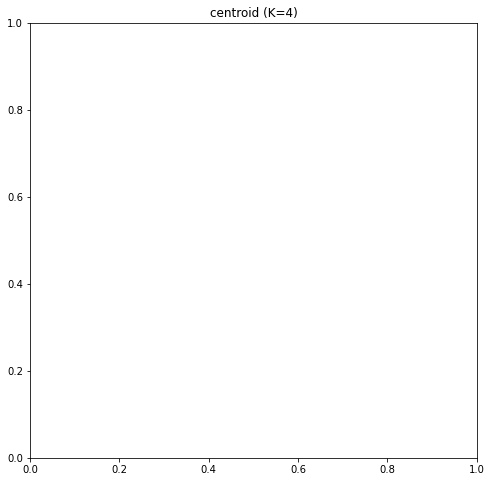

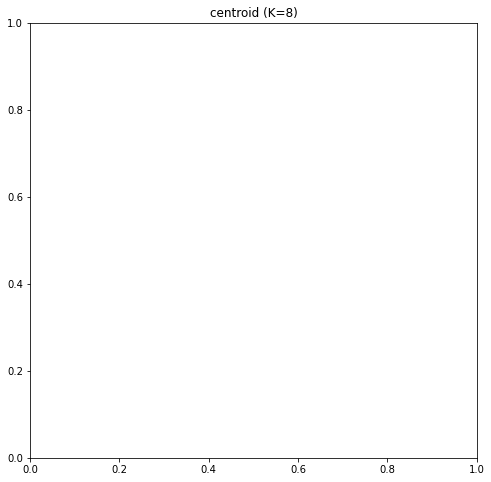

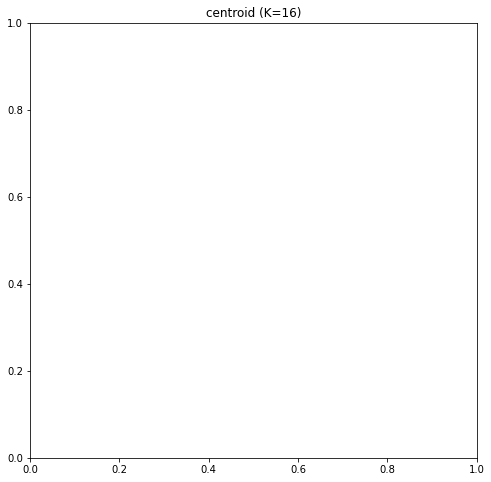

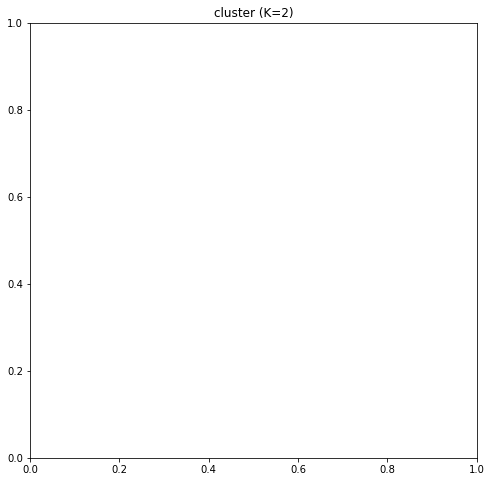

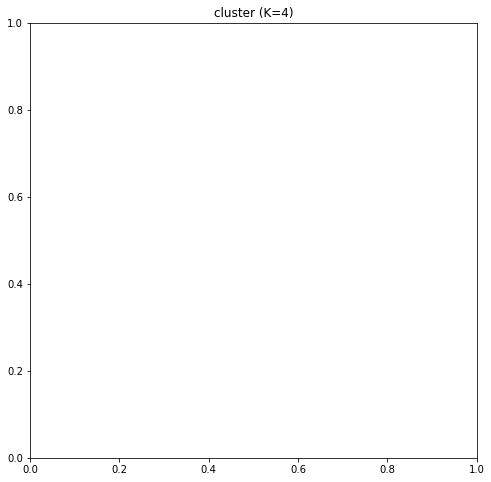

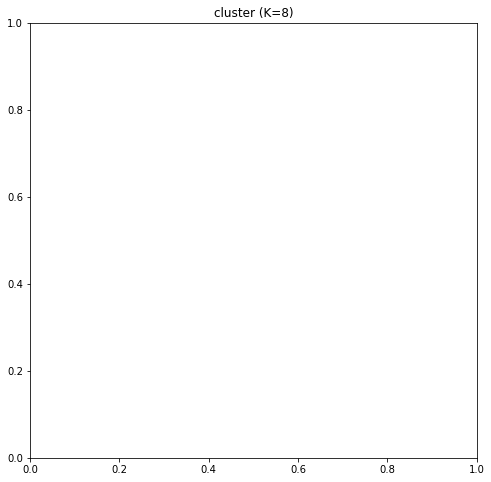

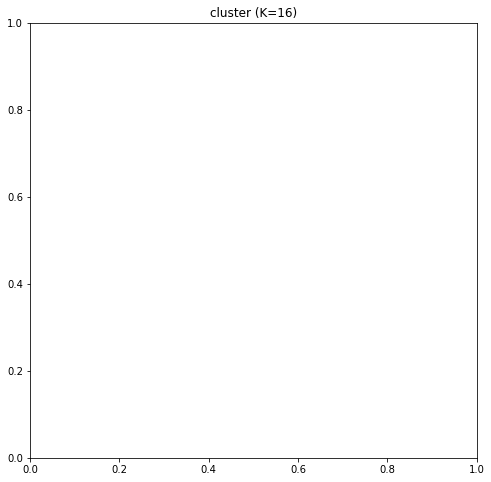

In [69]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)